# Section 1
In this section, we would like to visualize why using techniques of linear regression (using SSE cost function) fails in linear classification:

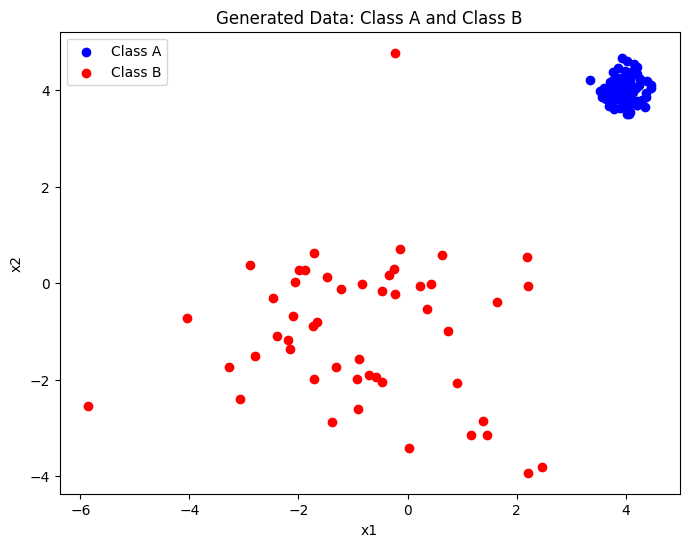

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
class_A = np.random.normal(loc=(4, 4), scale=0.25, size=(100,2))
labels_A = np.ones(class_A.shape[0])

class_B = np.random.normal(loc=(-1, -1), scale=1.5, size=(50,2))
labels_B = np.zeros(class_B.shape[0])

X = np.vstack((class_A, class_B))
y = np.hstack((labels_A,labels_B))

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


As you can see, the points are linearly separable in my ways. Now let's fit a line to them:

Model weights: w1 = 0.08, w2 = 0.11, bias = 0.22 


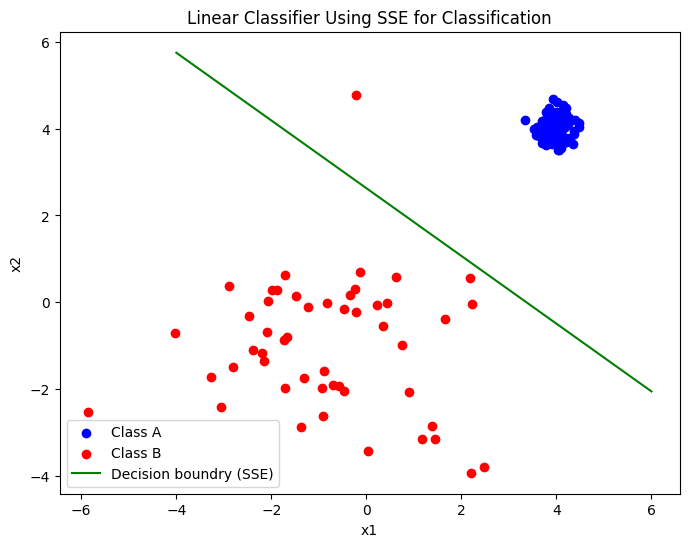

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

w1, w2 = model.coef_
w0 = model.intercept_

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f} ")

#Plot the decision boundry: w1 * x1 + w2 * x2 + b = 0.5
x_vals = np.linspace(-4, 6, 100)
decision_boundry = (-w1 * x_vals - w0 + 0.5) / w2

plt.figure(figsize=(8,6))
plt.scatter(class_A[:,0] , class_A[:,1], label='Class A', color='blue')
plt.scatter(class_B[:,0] , class_B[:,1], label='Class B', color='red')
plt.plot(x_vals, decision_boundry, label='Decision boundry (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Even the best fitted line fails to classify points. **Can you explain why?**

# Section 2

In this section, we would visualize linearly separable and non-linearly separable data.

# Part A: Linearly Separable Data

In [4]:
def generate_ab_class(n_points=100):
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, 10)
        if y > x and len(class_A) < n_points:
            class_A.append([x,y])
        if y < x and len(class_B) < n_points:
            class_B.append([x,y])
    return np.array(class_A), np.array(class_B)

class_A, class_B = generate_ab_class()

Plot the data points and include the decision boundry (y=x).

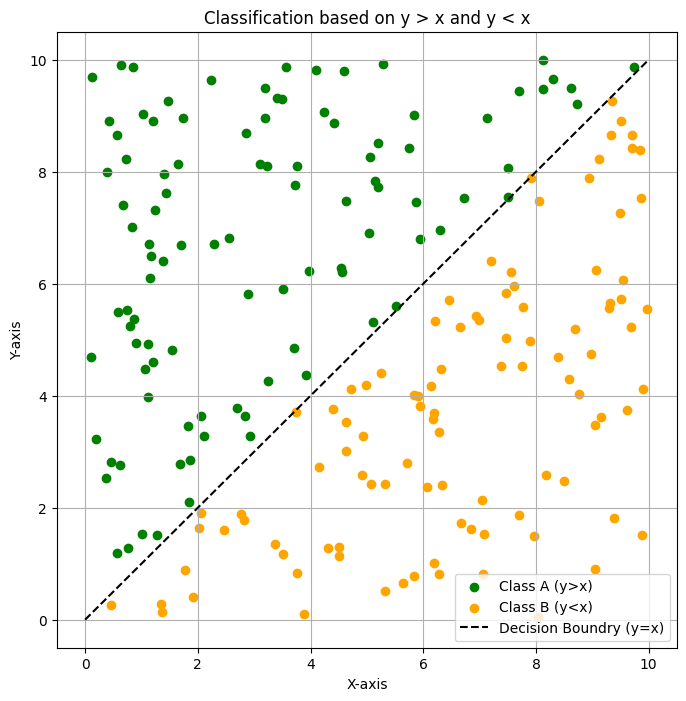

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(class_A[:,0], class_A[:, 1], color = 'green', label = 'Class A (y>x)')
plt.scatter(class_B[:,0], class_B[:, 1], color = 'orange', label = 'Class B (y<x)')
plt.plot([0,10], [0,10], color='black', linestyle='--', label = 'Decision Boundry (y=x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Classification based on y > x and y < x')
plt.legend()
plt.grid(True)
plt.show()

# Part B: Non-Linearly Separable Data (XOR Problem)

In [6]:
def generate_xor_data(n_points=200, seed=42):
    np.random.seed(42)
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if (x > 0.5 and y < 0.5) or (x < 0.5 and y < 0.5):
            if len(class_A) < n_points:
                class_A.append([x,y])
        else:
            if len(class_B) < n_points:
                class_B.append([x,y])
    return np.array(class_A), np.array(class_B)

class_A_xor, class_B_xor = generate_xor_data()

Plot the data points. Try to draw a linear decision boundry. Comment on why the classes cannot be seperated.

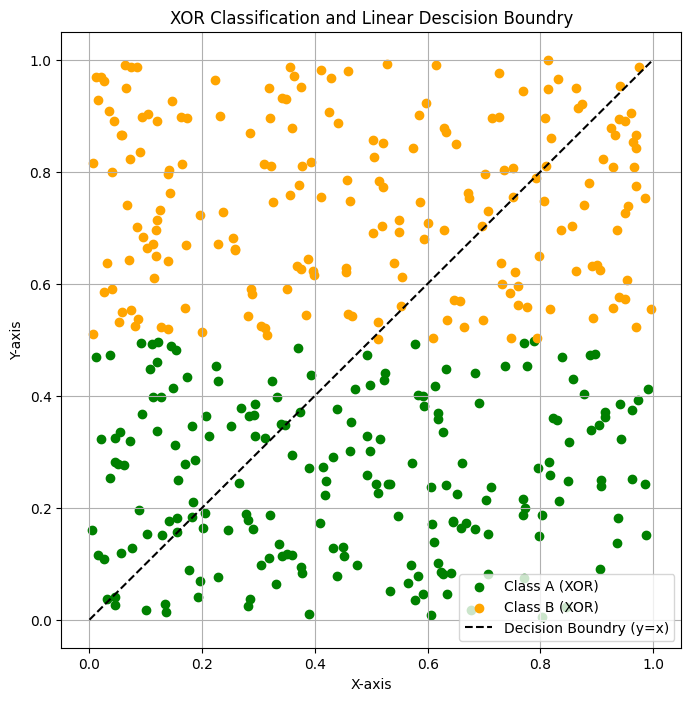

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(class_A_xor[:,0], class_A_xor[:, 1], color = 'green', label = 'Class A (XOR)')
plt.scatter(class_B_xor[:,0], class_B_xor[:, 1], color = 'orange', label = 'Class B (XOR)')
plt.plot([0,1], [0,1], color='black', linestyle='--', label = 'Decision Boundry (y=x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('XOR Classification and Linear Descision Boundry')
plt.legend()
plt.grid(True)
plt.show()


# Part C: Non-Linearly Separable Data (Circular data points)

In [8]:
def generate_data(n_points=200, seed=42):
    np.random.seed(42)

    # Class 0: points inside a circle with radius
    radius_0 = 5
    theta_0 = np.random.uniform(0, 2 * np.pi, n_points)
    r_0 = radius_0 * np.sqrt(np.random.uniform(0,1, n_points))
    x0 = r_0 * np.cos(theta_0)
    y0 = r_0 * np.sin(theta_0)
    class_0 = np.vstack((x0,y0)).T


    # Class 1: points in an annulus between radius 8 and 10
    inner_radius_1 = 8
    outer_radius_1 = 10
    theta_1 = np.random.uniform(0, 2 * np.pi, n_points)
    r_1 = np.sqrt(np.random.uniform(inner_radius_1**2, outer_radius_1**2, n_points))
    x1 = r_1 * np.cos(theta_1)
    y1 = r_1 * np.sin(theta_1)
    class_1 = np.vstack((x1,y1)).T

    return class_0,class_1


class_0, class_1 = generate_data()

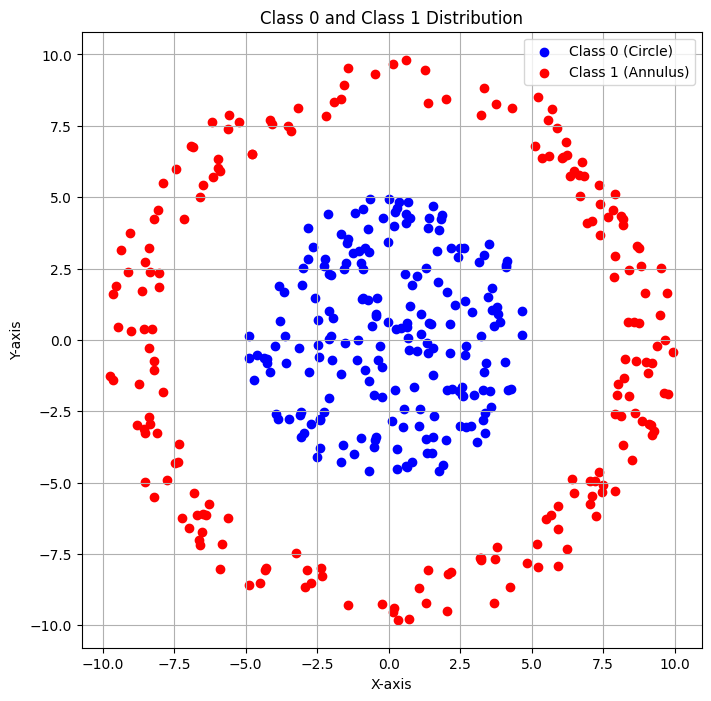

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(class_0[:,0], class_0[:,1], color='blue', label='Class 0 (Circle)')
plt.scatter(class_1[:,0], class_1[:,1], color='red', label='Class 1 (Annulus)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Class 0 and Class 1 Distribution')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

# Section 3
In this section, we will implement a perceptron classifier from scratch.

In [19]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epoch=1000):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch 
        self. weights = None
        self.bias = None
        self.errors_ = [] # storing the number of misclassifications in each epoch
    
    def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_sample]
            Target value. Must be +1 ot -1
        """
        n_samples, n_features = X.shape
        # starting weights and bias equal zeros
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for epoch in range(self.n_epoch):
            errors = 0
            for idx in range(n_samples):
                linear_output = np.dot(X[idx],self.weights) + self.bias
                y_pred = self._unit_step(linear_output)
                if y[idx] != y_pred:
                    update = self.learning_rate * y[idx]
                    self.weights += update
                    errors += 1
            self.errors_.append(errors)
            # if no errors, convergence achieved
            if errors == 0: 
                print(f"Convergence after {epoch+1} epochs")
                break

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        X : array-like, shape = [n_samples, n_features]

        Returns:
        array, shape = [n_sample]
            Predicted class labels.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)
    
    def _unnit_step(self,x):
        return np.where(x >= 0, 1, -1)